In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image, ExifTags
import random
import os
import random
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
folder = "E:/dataset"
def data_processing(folder):
    label = []
    pixel = []
    file_path = []
    for i, filename in enumerate(os.listdir(folder)):
        #pixel
        image_path = folder + "/" + filename
        file_path.append(image_path)
    random.shuffle(file_path)
    i=0
    for path in file_path:
        img = load_img(path, target_size=(224, 224))
        img = img_to_array(img)
        img = np.expand_dims(img, 0)
        #print(img.shape,"\n-------------------------------------------------------------\n")
        img = imagenet_utils.preprocess_input(img)
        pixel.append(img)

        #labels
        file_name = path.replace(folder+'/','')
        index = file_name.find('_')
        file_name = file_name[:index]
        #print(file_name,i)
        i+=1
        label.append(file_name)
    pixel = np.vstack(pixel)
    label = np.array(label)#.reshape(-1,1)
    #one-hot encode
    le = LabelBinarizer()
    label1 = le.fit_transform(label)
    print(label,"---",label1,"\n")
    return pixel,label1
pixel,label = data_processing(folder)
print("successful")

['normal' 'bottomleft' 'topright' ... 'topleft' 'bottomleft' 'topright'] --- [[0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 ...
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]] 

successful


In [4]:
model = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
for layer in model.layers:
    layer.trainable = False

In [5]:
full_model =keras.Sequential([
    model,
    layers.Flatten(),
    layers.Dense(4096,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6,activation='softmax')
])

X_train, X_test, y_train, y_test = train_test_split(pixel, label, test_size=0.2, random_state=42)
print(len(X_train),len(y_train))


1102 1102


In [7]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="training_2/cp-{epoch:04d}.ckpt",save_weights_only=True,verbose=1)
full_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = full_model.fit(X_train,y_train,epochs=10,batch_size=64,callbacks=[checkpoint])

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 146.8299 - accuracy: 0.5345 
Epoch 1: saving model to training_2\cp-0001.ckpt
18/18 [==============================] - 204s 11s/step - loss: 146.8299 - accuracy: 0.5345
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 4.1039 - accuracy: 0.8539 
Epoch 2: saving model to training_2\cp-0002.ckpt
18/18 [==============================] - 199s 11s/step - loss: 4.1039 - accuracy: 0.8539
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 1.5061 - accuracy: 0.9083 
Epoch 3: saving model to training_2\cp-0003.ckpt
18/18 [==============================] - 203s 11s/step - loss: 1.5061 - accuracy: 0.9083
Epoch 4/10
18/18 [==============================] - ETA: 0s - loss: 1.6576 - accuracy: 0.9192 
Epoch 4: saving model to training_2\cp-0004.ckpt
18/18 [==============================] - 198s 11s/step - loss: 1.6576 - accuracy: 0.9192
Epoch 5/10
18/18 [==============================] - ETA: 0s - lo

In [8]:
pred = full_model.evaluate(X_test,y_test)
print("Loss = ",pred[0])

9/9 [==============================] - 41s 4s/step - loss: 2.8265 - accuracy: 0.9203
Loss =  2.826547861099243


In [9]:

img = load_img(r"E:\Deeplearning prj\pythonProject\bottomright_0.jpg", target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, 0)
img = imagenet_utils.preprocess_input(img)
full_model.predict(img)

1/1 [==============================] - 1s 530ms/step


array([[1.6871505e-37, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.3568216e-21]], dtype=float32)

1/1 [==============================] - 0s 260ms/step


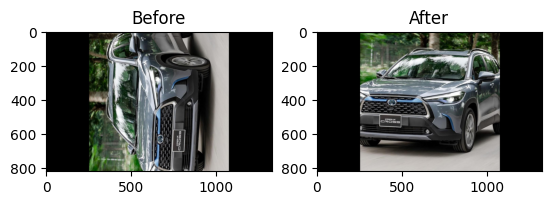

In [8]:
new_model = full_model
checkpoint1="training_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint1)
latest = tf.train.latest_checkpoint(checkpoint_dir)
new_model.load_weights(latest)
img_path = r"E:\Deeplearning prj\pythonProject\bottomright_0.jpg"
def transform_img(img_path,new_model):
    #make predict
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, 0)
    img = imagenet_utils.preprocess_input(img)
    arr = new_model.predict(img)
    id = arr.argmax()
    #ttransform_img
    if(id==0):
        image = Image.open(img_path)
        new_img = image.rotate(90)
    if(id==1):
        image = Image.open(img_path)
        new_img = image.rotate(270)
    if(id==2):
        image = Image.open(img_path)
        new_img = image
    if(id==3):
        image = Image.open(img_path)
        new_img = image.rotate(180)
    if(id==4):
        image = Image.open(img_path)
        new_img = image.rotate(90)
    if(id==5):
        image = Image.open(img_path)
        new_img = image.rotate(270)
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(image)
    ax.set_title('Before')
    ax = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(new_img)
    ax.set_title('After')
    plt.show()

transform_img(img_path,new_model)